In [128]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [129]:
#Reading all of  dataset collectively as whole using 'glob'
fileList = glob.glob("Dataset/*.csv")                              #Creating the list of filenames.
dataframes = [pd.read_csv(f) for f in fileList]                    #generating list of dataframes.
dataset = pd.concat(dataframes)                                    #concatenating all dataframes into one. 
#dataset.to_excel(r'AirPollutionDataset.xlsx')
dataset.sort_values(by = 'Sampling Date')
dataset = dataset.reset_index(drop=True)                           #making the indexing proper. 
dataset.head()

,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,1/2/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,25.4,96.9,374.0,663.0
1,1/3/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,20.3,115.4,406.0,673.0
2,1/8/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,32.4,115.0,323.0,607.0
3,1/9/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,16.2,114.4,267.0,469.0
4,15/1/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,28.2,80.3,267.0,484.0


In [130]:
dataset.shape

(2572, 9)

In [131]:
#Removing the irrelevent attributes.
dataset = dataset.drop(['State','City/Town/Village/Area','Type of Location'],axis = 1)
#correcting the format of date.
dataset['Sampling Date'] = pd.to_datetime(dataset['Sampling Date'])
dataset = dataset.sort_values(by = 'Sampling Date')
dataset = dataset.reset_index(drop=True)  
dataset.head()

,Sampling Date,Location of Monitoring Station,SO2,NO2,RSPM/PM10,SPM
0,2006-01-02,Shahdara,11.6,36.3,91.0,312.0
1,2006-01-02,Janakpuri,12.4,51.2,156.0,350.0
2,2006-01-03,Ashok Vihar,6.7,41.8,159.0,363.0
3,2006-01-03,Siri Fort,6.7,30.8,116.0,238.0
4,2006-01-03,Town Hall,4.9,57.9,147.0,391.0


In [132]:
dataset.isnull().sum()                           #showing the number null values of each attribute. 

Sampling Date                       0
Location of Monitoring Station      0
SO2                               164
NO2                                28
RSPM/PM10                         172
SPM                                60
dtype: int64

In [133]:
#creating the groups of dataset according to the specific locations of Delhi.
grouped = dataset.groupby('Location of Monitoring Station')
for name,group in grouped:
    print(name)
    print(group.head())

Ashok Vihar
   Sampling Date Location of Monitoring Station  SO2   NO2  RSPM/PM10    SPM
2     2006-01-03                    Ashok Vihar  6.7  41.8      159.0  363.0
15    2006-01-06                    Ashok Vihar  6.7  43.3      140.0  298.0
22    2006-01-12                    Ashok Vihar  6.7  47.2      183.0  467.0
33    2006-01-17                    Ashok Vihar  7.2  48.2      176.0  436.0
42    2006-01-20                    Ashok Vihar  7.0  49.5      189.0  538.0
Janakpuri
   Sampling Date Location of Monitoring Station   SO2   NO2  RSPM/PM10    SPM
1     2006-01-02                      Janakpuri  12.4  51.2      156.0  350.0
12    2006-01-05                      Janakpuri  11.2  51.0      129.0  328.0
19    2006-01-10                      Janakpuri  10.3  38.8      236.0  537.0
27    2006-01-16                      Janakpuri  12.7  55.7      180.0  389.0
39    2006-01-19                      Janakpuri  14.8  56.7      111.0  326.0
Mayapuri Indl. Area
   Sampling Date Location of

In [134]:
loc = dataset['Location of Monitoring Station']
Ashok = loc.str.contains('Ashok Vihar')
janak = loc.str.contains('Janakpuri')
Maya = loc.str.contains('Mayapuri')
NYS = loc.str.contains('N.Y.')
Niza = loc.str.contains('Nizamuddin')
Prit = loc.str.contains('Pritampura')
Shahdara = loc.str.contains('Shahdara|Shahadra',regex = True)
Shahzada = loc.str.contains('Shahzada')
Siri = loc.str.contains('Siri')
Town = loc.str.contains('Town Hall')

dataset['Location of Monitoring Station'] = np.where(Ashok,'Ashok Vihar',
                                                     np.where(janak,'Janakpuri',
                                                             np.where(Maya,'Mayapuri Industrial Area',
                                                                     np.where(NYS,'N.Y. SCHOOL',
                                                                             np.where(Niza,'Nizamuddin',
                                                                                     np.where(Prit,'Pritampura',
                                                                                             np.where(Shahdara,'Shahdara',
                                                                                                     np.where(Shahzada,'Shahzada Bagh',
                                                                                                             np.where(Siri,'Siri Fort',
                                                                                                                     np.where(Town,'Town Hall',loc))))))))))

In [135]:
grouped = dataset.groupby('Location of Monitoring Station')
for name,group in grouped:
    print(name)
    print(group.head())

Ashok Vihar
   Sampling Date Location of Monitoring Station  SO2   NO2  RSPM/PM10    SPM
2     2006-01-03                    Ashok Vihar  6.7  41.8      159.0  363.0
15    2006-01-06                    Ashok Vihar  6.7  43.3      140.0  298.0
22    2006-01-12                    Ashok Vihar  6.7  47.2      183.0  467.0
33    2006-01-17                    Ashok Vihar  7.2  48.2      176.0  436.0
42    2006-01-20                    Ashok Vihar  7.0  49.5      189.0  538.0
Janakpuri
   Sampling Date Location of Monitoring Station   SO2   NO2  RSPM/PM10    SPM
1     2006-01-02                      Janakpuri  12.4  51.2      156.0  350.0
12    2006-01-05                      Janakpuri  11.2  51.0      129.0  328.0
19    2006-01-10                      Janakpuri  10.3  38.8      236.0  537.0
27    2006-01-16                      Janakpuri  12.7  55.7      180.0  389.0
39    2006-01-19                      Janakpuri  14.8  56.7      111.0  326.0
Mayapuri Industrial Area
   Sampling Date Locati

In [136]:
# describe() is used to find count, mean, standard deviation, all Q values.
grouped.describe()

NO2                                     \
                                count       mean        std   min    25%   
Location of Monitoring Station                                             
Ashok Vihar                       9.0  50.655556   6.999306  41.8  47.20   
Janakpuri                       301.0  50.909635   9.507415  18.2  44.70   
Mayapuri Industrial Area        287.0  64.299652  27.384632  16.6  44.05   
N.Y. SCHOOL                     254.0  60.096063  24.561508  16.3  40.40   
Nizamuddin                      282.0  44.069504  12.925604  18.2  34.30   
Pritampura                      255.0  33.989412  10.132714  13.3  28.40   
Shahdara                        299.0  48.127425  15.273787  24.0  37.10   
Shahzada Bagh                   279.0  43.729749  15.606594  11.5  33.90   
Siri Fort                       295.0  44.754237  11.823362  15.5  36.00   
Town Hall                       283.0  70.929329  30.079288  14.6  46.15   

                                                    RSPM/PM10              \
                                 50%     75%    max     count        mean   
Location of Monitoring Station                                              
Ashok Vihar                     49.5  52.700   62.0       9.0  190.111111   
Janakpuri                       51.7  57.000   76.7     281.0  209.177936   
Mayapuri Industrial Area        59.0  85.300  142.1     287.0  265.390244   
N.Y. SCHOOL                     56.6  78.375  147.5     253.0  180.407115   
Nizamuddin                      45.4  52.650  104.2     234.0  181.683761   
Pritampura                      33.0  38.200   87.8     247.0  164.777328   
Shahdara                        45.5  56.250  110.0     258.0  185.151163   
Shahzada Bagh                   39.3  50.200  114.7     274.0  184.233577   
Siri Fort                       46.5  53.300   77.7     275.0  201.640000   
Town Hall                       69.5  89.250  159.2     282.0  270.946809   

                                 ...      SO2          SPM              \
                                 ...      75%   max  count        mean   
Location of Monitoring Station   ...                                     
Ashok Vihar                      ...     7.80   9.3    9.0  460.555556   
Janakpuri                        ...     6.20  15.8  288.0  410.864583   
Mayapuri Industrial Area         ...    18.75  34.9  286.0  533.395105   
N.Y. SCHOOL                      ...     9.30  18.7  254.0  377.645669   
Nizamuddin                       ...     6.30  17.7  280.0  404.142857   
Pritampura                       ...     4.50  26.2  244.0  374.500000   
Shahdara                         ...     5.90  44.3  302.0  437.817881   
Shahzada Bagh                    ...     6.20  18.2  273.0  443.699634   
Siri Fort                        ...     5.80  13.3  293.0  391.095563   
Town Hall                        ...    16.40  31.3  283.0  536.614841   

                                                                          \
                                       std    min     25%    50%     75%   
Location of Monitoring Station                                             
Ashok Vihar                      99.454903  298.0  432.00  447.0  527.00   
Janakpuri                       163.835876  106.0  296.25  397.0  519.25   
Mayapuri Industrial Area        209.943538   64.0  380.50  528.5  686.50   
N.Y. SCHOOL                     168.972670   62.0  257.25  381.0  483.00   
Nizamuddin                      184.460565   74.0  264.00  374.0  507.25   
Pritampura                      153.443989   75.0  267.00  348.0  448.50   
Shahdara                        173.262662  120.0  315.25  427.5  541.50   
Shahzada Bagh                   175.967821  118.0  305.00  424.0  548.00   
Siri Fort                       171.202049   68.0  264.00  383.0  499.00   
Town Hall                       214.589109   60.0  380.00  521.0  674.50   

                                        
                                   max  
Location 

In [137]:
#Making correlation matrix to observe relation between attributes.
grouped.corr()

NO2  RSPM/PM10       SO2  \
Location of Monitoring Station                                            
Ashok Vihar                    NO2        1.000000   0.845476  0.942606   
                               RSPM/PM10  0.845476   1.000000  0.675329   
                               SO2        0.942606   0.675329  1.000000   
                               SPM        0.834079   0.834726  0.702784   
Janakpuri                      NO2        1.000000   0.379824  0.143381   
                               RSPM/PM10  0.379824   1.000000 -0.100537   
                               SO2        0.143381  -0.100537  1.000000   
                               SPM        0.355216   0.777446 -0.045542   
Mayapuri Industrial Area       NO2        1.000000   0.579133  0.487372   
                               RSPM/PM10  0.579133   1.000000  0.328354   
                               SO2        0.487372   0.328354  1.000000   
                               SPM        0.490131   0.893934  0.334285   
N.Y. SCHOOL                    NO2        1.000000   0.420031  0.237291   
                               RSPM/PM10  0.420031   1.000000  0.064645   
                               SO2        0.237291   0.064645  1.000000   
                               SPM        0.359100   0.899190  0.097360   
Nizamuddin                     NO2        1.000000   0.470211  0.330892   
                               RSPM/PM10  0.470211   1.000000 -0.086685   
                               SO2        0.330892  -0.086685  1.000000   
                               SPM        0.410679   0.777739 -0.007471   
Pritampura                     NO2        1.000000   0.289955  0.118223   
                               RSPM/PM10  0.289955   1.000000 -0.137651   
                               SO2        0.118223  -0.137651  1.000000   
                               SPM        0.390277   0.850470 -0.041417   
Shahdara                       NO2        1.000000   0.585687  0.165371   
                               RSPM/PM10  0.585687   1.000000  0.015578   
                               SO2        0.165371   0.015578  1.000000   
                               SPM        0.600408   0.841535  0.125753   
Shahzada Bagh                  NO2        1.000000   0.538895  0.390945   
                               RSPM/PM10  0.538895   1.000000  0.162586   
                               SO2        0.390945   0.162586  1.000000   
                               SPM        0.485875   0.854448  0.140205   
Siri Fort                      NO2        1.000000   0.546008  0.171481   
                               RSPM/PM10  0.546008   1.000000  0.017946   
                               SO2        0.171481   0.017946  1.000000   
                               SPM        0.572084   0.835655  0.211664   
Town Hall                      NO2        1.000000   0.491366  0.456436   
                               RSPM/PM10  0.491366   1.000000  0.284134   
                               SO2        0.456436   0.284134  1.000000   
                               SPM        0.543644   0.831671  0.341653   

                                               SPM  
Location of Monitoring Station                      
Ashok Vihar                    NO2        0.834079  
                               RSPM/PM10  0.834726  
                               SO2        0.702784  
                               SPM        1.000000  
Janakpuri                      NO2        0.355216  
                               RSPM/PM10  0.777446  
                               SO2       -0.045542  
                               SPM        1.000000  
Mayapuri Industrial Area       NO2        0.490131  
                               RSPM/PM10  0.893934  
                               SO2        0.334285  
                               SPM        1.000000  
N.Y. SCHOOL                    NO2        0.359100  
                               RSPM/PM10  0.899190  
                               SO2        0.0973

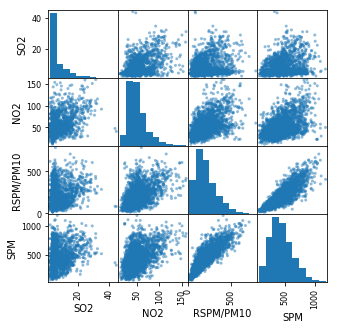

In [140]:
#Drawing the scatter plot of attributes to observe relation between attributes.
pd.plotting.scatter_matrix(dataset, figsize=(5, 5))
plt.show()

Ashok Vihar


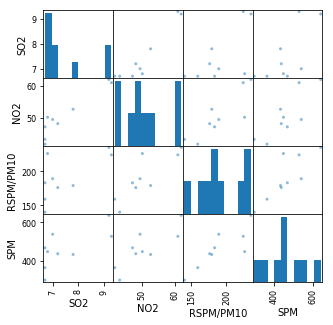

Janakpuri


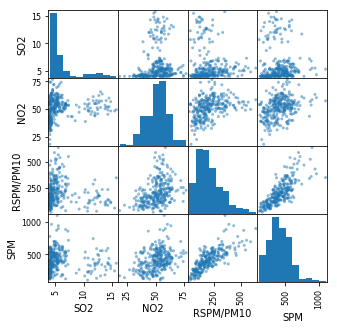

Mayapuri Industrial Area


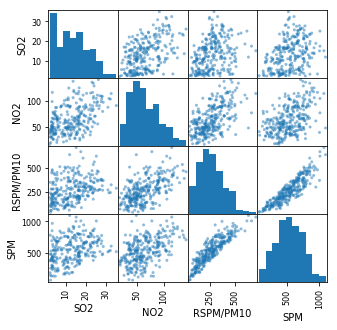

N.Y. SCHOOL


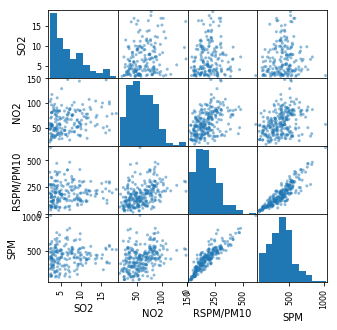

Nizamuddin


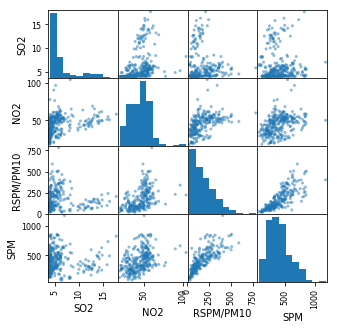

Pritampura


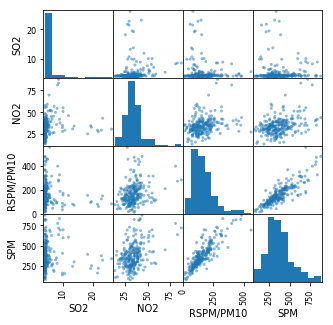

Shahdara


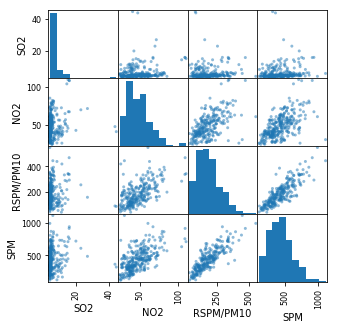

Shahzada Bagh


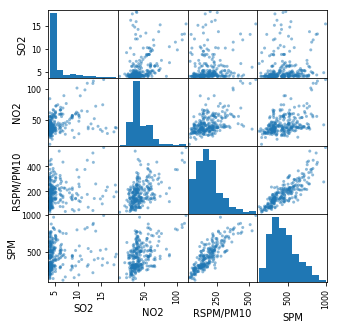

Siri Fort


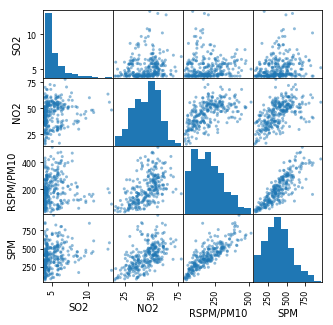

Town Hall


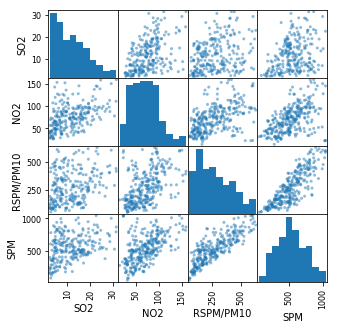

In [141]:
for name,group in grouped:
    print(name)
    if(name != 'DCE'):
        pd.plotting.scatter_matrix(group,figsize=(5,5))
        plt.show()

In [142]:
for name,group in grouped:
    print(name)
    print('Count = ',group.shape)
    print(group.isnull().sum())
    print('\n')

Ashok Vihar
Count =  (9, 6)
Sampling Date                     0
Location of Monitoring Station    0
SO2                               0
NO2                               0
RSPM/PM10                         0
SPM                               0
dtype: int64


Janakpuri
Count =  (303, 6)
Sampling Date                      0
Location of Monitoring Station     0
SO2                                2
NO2                                2
RSPM/PM10                         22
SPM                               15
dtype: int64


Mayapuri Industrial Area
Count =  (287, 6)
Sampling Date                      0
Location of Monitoring Station     0
SO2                               24
NO2                                0
RSPM/PM10                          0
SPM                                1
dtype: int64


N.Y. SCHOOL
Count =  (254, 6)
Sampling Date                      0
Location of Monitoring Station     0
SO2                               69
NO2                                0
RSPM/PM10         

Ashok Vihar


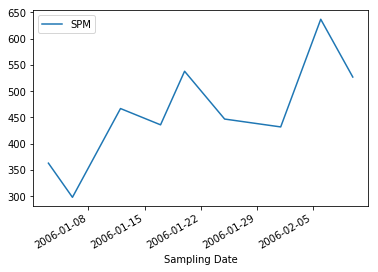

Janakpuri


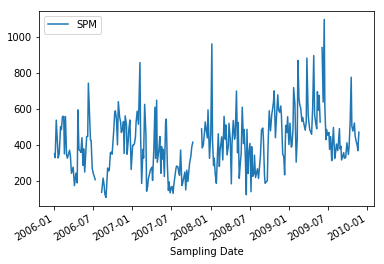

Mayapuri Industrial Area


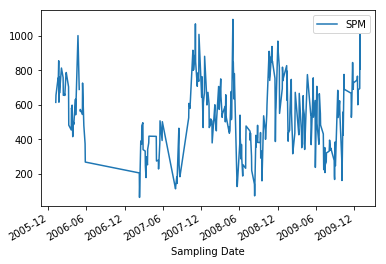

N.Y. SCHOOL


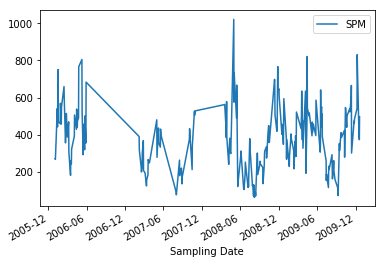

Nizamuddin


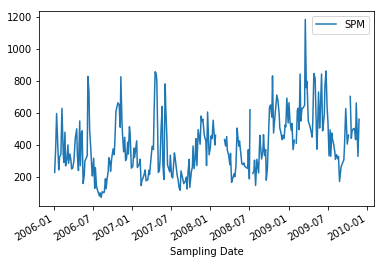

Pritampura


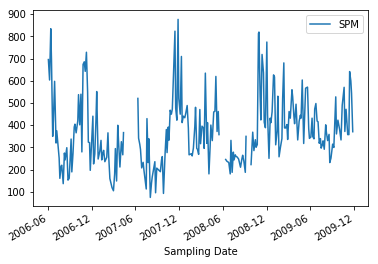

Shahdara


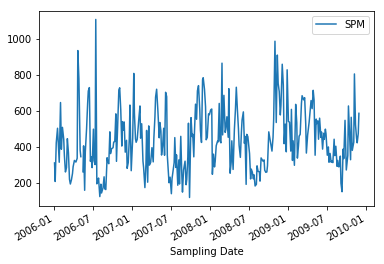

Shahzada Bagh


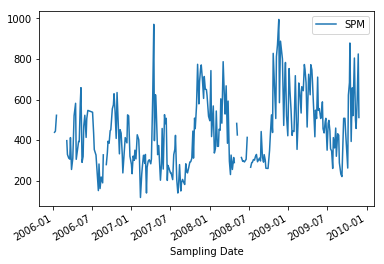

Siri Fort


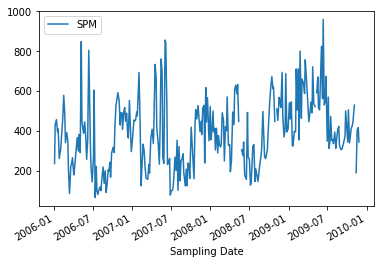

Town Hall


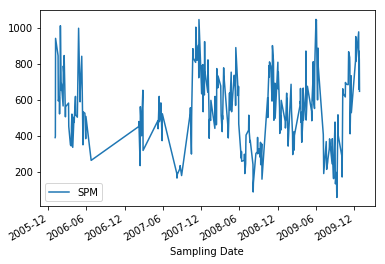

In [143]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'SPM')
        plt.show()

Ashok Vihar


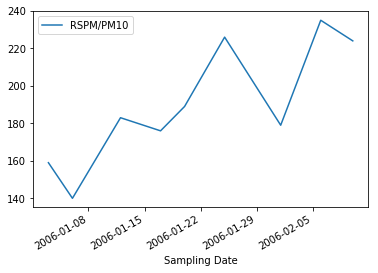

Janakpuri


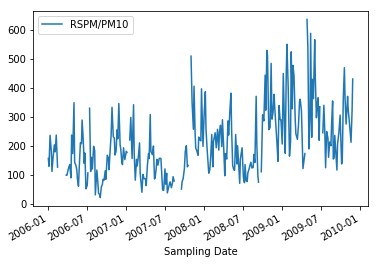

Mayapuri Industrial Area


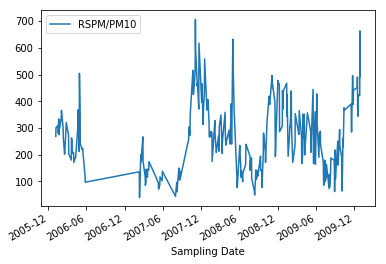

N.Y. SCHOOL


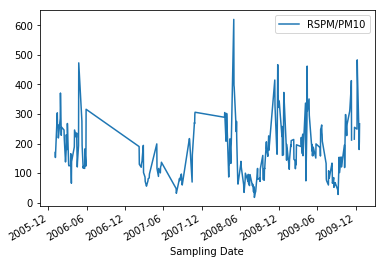

Nizamuddin


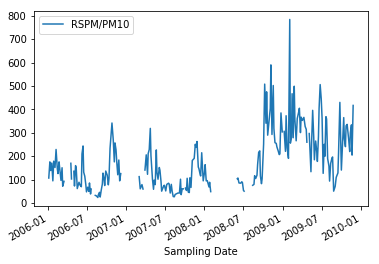

Pritampura


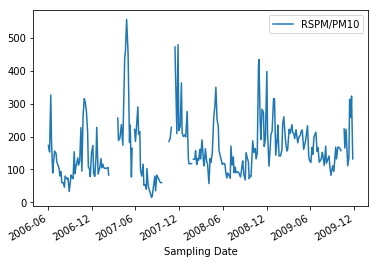

Shahdara


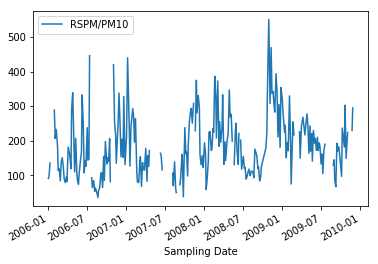

Shahzada Bagh


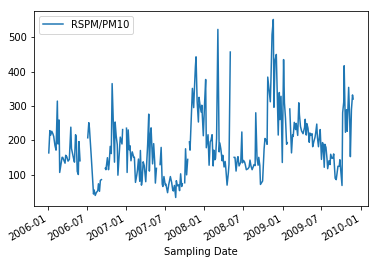

Siri Fort


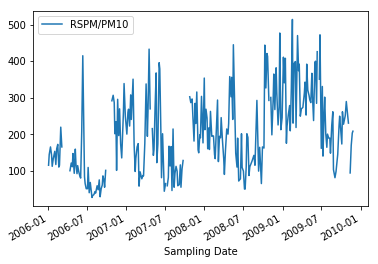

Town Hall


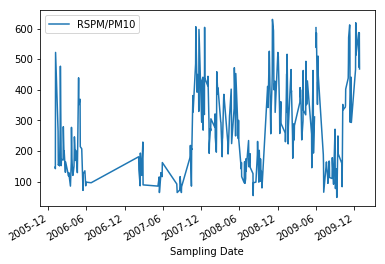

In [144]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'RSPM/PM10')
        plt.show()

Ashok Vihar


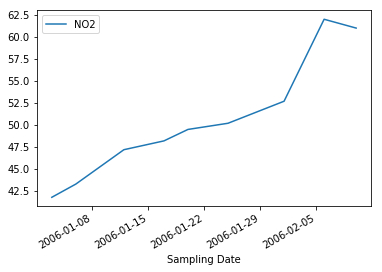

Janakpuri


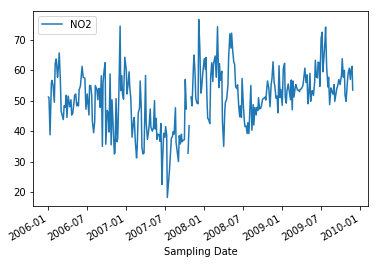

Mayapuri Industrial Area


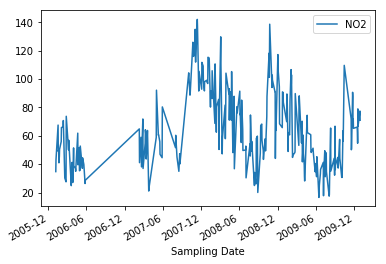

N.Y. SCHOOL


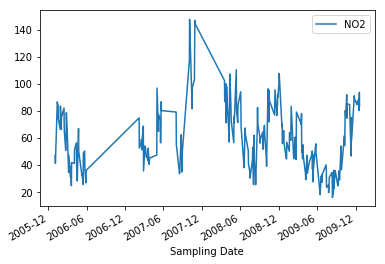

Nizamuddin


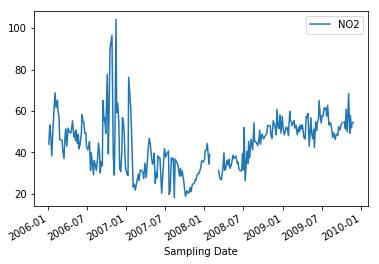

Pritampura


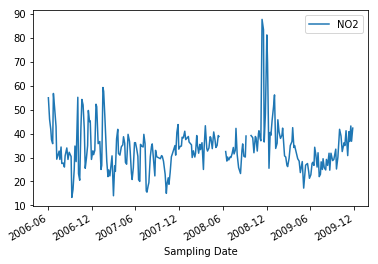

Shahdara


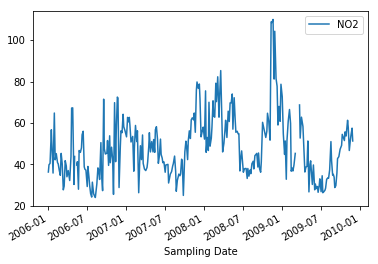

Shahzada Bagh


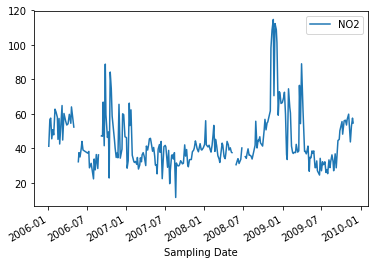

Siri Fort


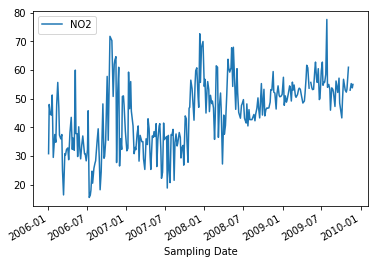

Town Hall


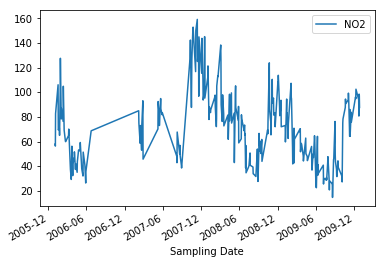

In [145]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'NO2')
        plt.show()

Ashok Vihar


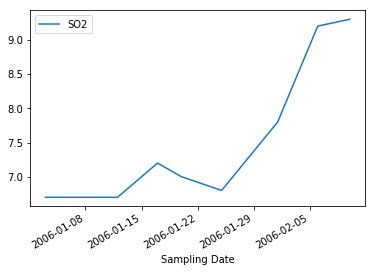

Janakpuri


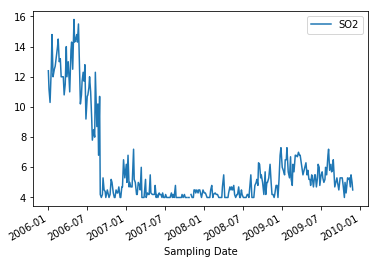

Mayapuri Industrial Area


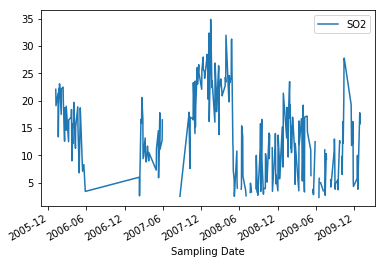

N.Y. SCHOOL


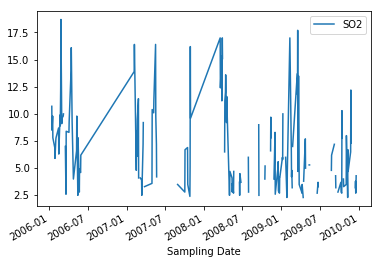

Nizamuddin


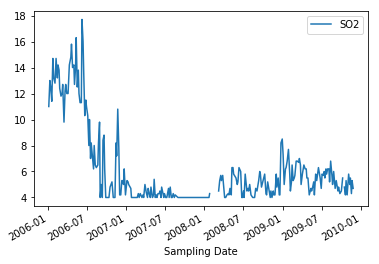

Pritampura


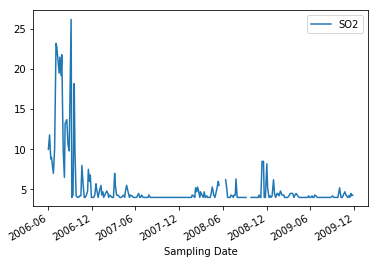

Shahdara


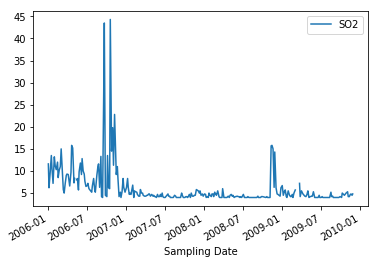

Shahzada Bagh


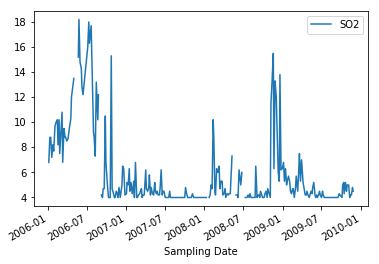

Siri Fort


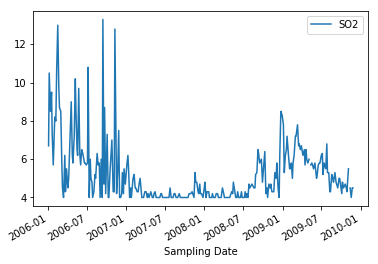

Town Hall


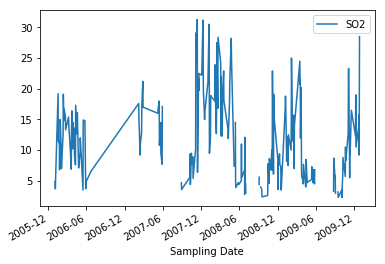

In [146]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'SO2')
        plt.show()

In [147]:
import plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
py.offline.init_notebook_mode(connected = True)
dataMaya = grouped.get_group('Siri Fort')
#layout = go.layout(
    #title = 'TIME SERIES GRAPH',
    #yaxis = dict(
    #   title = 'SPM'
    #),
    #xaxis = dict(
    #    title='TIME'
    #)
#)

trace = go.Scatter(
    y = dataMaya.SPM,
    x = dataMaya['Sampling Date'],
    mode = 'lines',
    name = 'Dataset',
    line = dict(
        shape = 'spline'
    )
)

data = go.Figure(data = [trace])

py.offline.iplot(data)


In [148]:
dataMaya = dataMaya.set_index('Sampling Date',drop = True)

In [154]:
d1 = dataMaya.ffill()
d2 = dataMaya.dropna()
print(d1.count())
d1.isnull().sum()

NO2          297
RSPM/PM10    297
SO2          297
SPM          297
dtype: int64


NO2          0
RSPM/PM10    0
SO2          0
SPM          0
dtype: int64

In [150]:
#d1.asfreq('5D',method = 'ffill')
#print('Count',d1.count(),'Number of null Values',d1.isnull().sum(),sep = '\n')
#d2 = d1.dropna()
#print('Count',d2.count(),'Number of null Values',d2.isnull().sum(),sep = '\n')

In [151]:
import plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
py.offline.init_notebook_mode(connected = True)
#d = dataMaya.interpolate()
#layout = go.layout(
    #title = 'TIME SERIES GRAPH',
    #yaxis = dict(
    #   title = 'SPM'
    #),
    #xaxis = dict(
    #    title='TIME'
    #)
#)

trace = go.Scatter(
    y = d1.SPM,
    x = d1.index,
    mode = 'lines',
    name = 'Dataset',
    line = dict(
        shape = 'spline'
    )
)

data = go.Figure(data = [trace])

py.offline.iplot(data)

In [152]:
d1.isnull().sum()

NO2          0
RSPM/PM10    0
SO2          0
SPM          0
dtype: int64

In [153]:
#d1 = d1.resample('D')

In [123]:
#d1.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:


.resample() is now a deferred operation
You called isnull(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead



NO2          1428
RSPM/PM10    1428
SO2          1428
SPM          1428
dtype: int64

In [165]:
d3 = d1.to_timestamp()

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

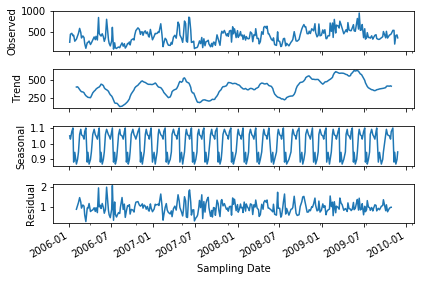

In [158]:
result = sm.tsa.seasonal_decompose(d1['SPM'], model='multiplicative',freq = 12)
result.plot()
plt.show()

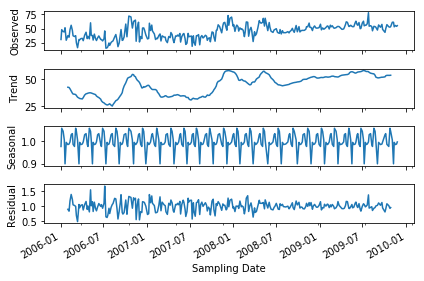

In [159]:
result = sm.tsa.seasonal_decompose(d1['NO2'], model='multiplicative',freq = 12)
result.plot()
plt.show()

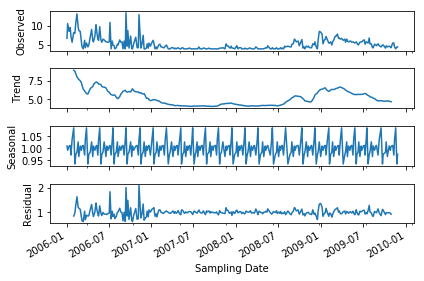

In [167]:
result = sm.tsa.seasonal_decompose(d1['SO2'], model='multiplicative',freq = 12)
result.plot()
plt.show()

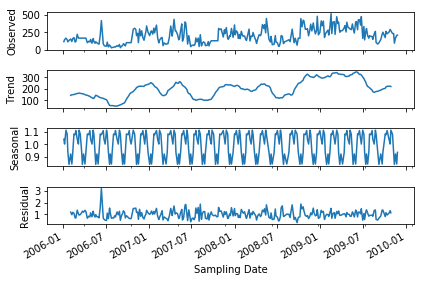

In [168]:
result = sm.tsa.seasonal_decompose(d1['RSPM/PM10'], model='multiplicative',freq = 12)
result.plot()
plt.show()

In [169]:
log_data = np.log(d1.SPM)
log_data[1:10]

Sampling Date
2006-01-06    6.073045
2006-01-12    6.126869
2006-01-17    5.983936
2006-01-20    6.021023
2006-01-25    5.572154
2006-02-01    5.746203
2006-02-06    5.973810
2006-02-10    6.126869
2006-02-15    6.363028
Name: SPM, dtype: float64

In [170]:
log_data_diff = log_data - log_data.shift()

In [171]:
log_data_diff.dropna(inplace=True)
log_data_diff[1:10]

Sampling Date
2006-01-12    0.053825
2006-01-17   -0.142933
2006-01-20    0.037087
2006-01-25   -0.448869
2006-02-01    0.174049
2006-02-06    0.227606
2006-02-10    0.153060
2006-02-15    0.236159
2006-02-20   -0.193417
Name: SPM, dtype: float64

In [230]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_data_diff.values, nlags = 20)                  #to find p value for ARIMA model
lag_pacf = pacf(log_data_diff.values, nlags = 20)                # to find q value for ARIMA model

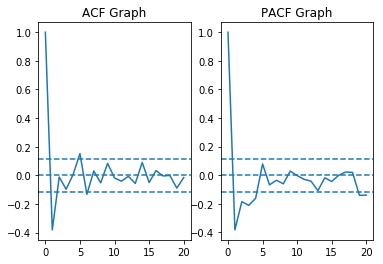

In [231]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.title('ACF Graph')
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_data_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_data_diff)),linestyle='--')

plt.subplot(122) 
plt.plot(lag_pacf)
plt.title('PACF Graph')
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_data_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_data_diff)),linestyle='--')
plt.show()

In [176]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5,1,'RSS: 46.7944')

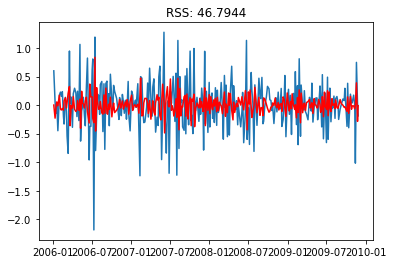

In [219]:
# AR model
model = ARIMA(log_data, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(log_data_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_data_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5,1,'RSS: 43.1904')

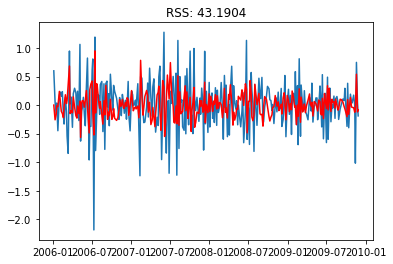

In [220]:
# MA model
model = ARIMA(log_data, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(log_data_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_data_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5,1,'RSS: 42.8537')

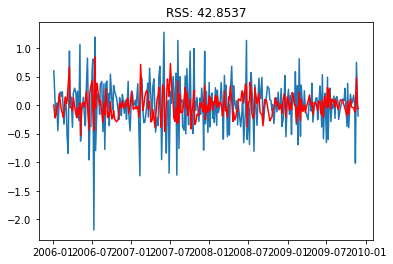

In [267]:
# ARIMA model
model = ARIMA(log_data, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(log_data_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_data_diff)**2))

In [210]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Sampling Date
2006-01-06    0.000366
2006-01-12   -0.224262
2006-01-17   -0.162848
2006-01-20   -0.035043
2006-01-25   -0.041985
dtype: float64


In [211]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Sampling Date
2006-01-06    0.000366
2006-01-12   -0.223896
2006-01-17   -0.386744
2006-01-20   -0.421787
2006-01-25   -0.463772
dtype: float64


In [212]:
predictions_ARIMA_log = pd.Series(log_data.ix[0], index=log_data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Sampling Date
2006-01-03    5.472271
2006-01-06    5.472636
2006-01-12    5.248375
2006-01-17    5.085527
2006-01-20    5.050484
dtype: float64

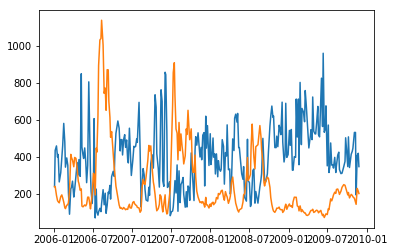

In [213]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(d1.SPM)
plt.plot(predictions_ARIMA)

In [265]:
pd.Series(log_data.ix[0], index=log_data.index)

Sampling Date
2006-01-03    5.472271
2006-01-06    5.472271
2006-01-12    5.472271
2006-01-17    5.472271
2006-01-20    5.472271
2006-01-25    5.472271
2006-02-01    5.472271
2006-02-06    5.472271
2006-02-10    5.472271
2006-02-15    5.472271
2006-02-20    5.472271
2006-02-23    5.472271
2006-03-01    5.472271
2006-03-06    5.472271
2006-03-09    5.472271
2006-03-14    5.472271
2006-03-20    5.472271
2006-03-23    5.472271
2006-03-28    5.472271
2006-04-03    5.472271
2006-04-07    5.472271
2006-04-13    5.472271
2006-04-19    5.472271
2006-04-24    5.472271
2006-04-27    5.472271
2006-05-03    5.472271
2006-05-08    5.472271
2006-05-11    5.472271
2006-05-16    5.472271
2006-05-19    5.472271
                ...   
2009-07-06    5.472271
2009-07-09    5.472271
2009-07-14    5.472271
2009-07-17    5.472271
2009-07-22    5.472271
2009-07-27    5.472271
2009-07-30    5.472271
2009-08-05    5.472271
2009-08-10    5.472271
2009-08-13    5.472271
2009-08-19    5.472271
2009-08-24    5.4722

Sampling Date
2006-01-03    238.0
2006-01-06    434.0
2006-01-12    458.0
2006-01-17    397.0
2006-01-20    412.0
Name: SPM, dtype: float64